# Project data analysis - Velib Python

### Presentation of data

Description:

Load: rows = stations, columns = time stamp (each hour for a week 24*7=168)

Coord = rows: stations, columns = {Latitude, Longitude, bonus, name}

In [224]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')

%matplotlib inline

In [225]:
load = pd.read_csv('data/velibLoading.csv', sep = " ")  # Reading data of the Velib loading
load.head()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


In [226]:
load.dtypes

Lun-00    float64
Lun-01    float64
Lun-02    float64
Lun-03    float64
Lun-04    float64
           ...   
Dim-19    float64
Dim-20    float64
Dim-21    float64
Dim-22    float64
Dim-23    float64
Length: 168, dtype: object

In [227]:
load.describe()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,...,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.401503,0.408770,0.411718,0.415161,0.417136,0.421650,0.419860,0.415729,0.384658,0.326331,...,0.346147,0.325526,0.311334,0.306399,0.314730,0.334080,0.353493,0.385975,0.392552,0.397529
std,0.337079,0.335566,0.336132,0.337158,0.332237,0.326644,0.323422,0.319302,0.303621,0.314026,...,0.340516,0.339897,0.336863,0.331194,0.322904,0.317279,0.317572,0.328448,0.335061,0.341536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093750,0.093023,0.096774,0.100000,0.108696,0.114286,0.114286,0.117647,0.114286,0.047619,...,0.051282,0.041667,0.038462,0.043478,0.052632,0.071429,0.080000,0.095238,0.086957,0.090909
50%,0.312500,0.333333,0.342857,0.350000,0.357143,0.363636,0.360000,0.360000,0.320000,0.215385,...,0.204082,0.166667,0.151515,0.142857,0.172414,0.200000,0.238095,0.285714,0.292683,0.292683
75%,0.694444,0.705882,0.708333,0.710526,0.700000,0.700000,0.700000,0.687500,0.636364,0.575000,...,0.651163,0.608696,0.555556,0.550000,0.550000,0.558140,0.600000,0.666667,0.666667,0.692308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
coord = pd.read_csv('data/velibCoord.csv', sep = " ") # Reading coordinates for each loading
coord.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


In [229]:
coord.dtypes

longitude    float64
latitude     float64
bonus          int64
names         object
dtype: object

In [230]:
coord.describe()

,longitude,latitude,bonus
count,1189.000000,1189.000000,1189.000000
mean,2.342512,48.859207,0.106812
std,0.044825,0.023597,0.309005
min,2.222189,48.806380,0.000000
25%,2.310820,48.841249,0.000000
50%,2.343574,48.859403,0.000000
75%,2.374277,48.877520,0.000000
max,2.479464,48.915199,1.000000


In [231]:
print(f'Shape of "load": {load.shape}')
number_of_missing_values_load = load.isna().sum().sum()
number_of_duplicate_values_load = load.duplicated().sum() 
print(f'Number of missing values "load": {number_of_missing_values_load}')
print(f'Number of duplicate values "load": {number_of_duplicate_values_load}\n')

print(f'Shape of "coord": {coord.shape}')
number_of_missing_values_coord = coord.isna().sum().sum()
number_of_duplicate_values_coord = coord.duplicated().sum() 
print(f'Missing values "coord": {number_of_missing_values_coord}')
print(f'Number of duplicate values "coord": {number_of_missing_values_coord}')

Shape of "load": (1189, 168)
Number of missing values "load": 0
Number of duplicate values "load": 0

Shape of "coord": (1189, 4)
Missing values "coord": 0
Number of duplicate values "coord": 0


In [232]:
station_names = coord.names.value_counts().sort_values(ascending=False)
print(station_name)
# print(station_names)
# station_names.values

indexes = np.argwhere(station_names.values>1).flatten()
print(station_names.index[indexes])
print(f'\nNumber of stations with multiple occurances in coord: {len(station_names.index[indexes])}')

names
 PORTE DES LILAS           3
 GARE D'AUSTERLITZ         3
 GARE DE L'EST             2
 AQUEDUC                   2
 DODU                      2
                          ..
 CHARONNE                  1
 BOUSSINGAULT - TOLBIAC    1
 RIVOLI MAIRIE DU 1ER      1
 JOURDAN BARBOUX           1
 QUAI VOLTAIRE             1
Name: count, Length: 1161, dtype: int64
Index([' PORTE DES LILAS', ' GARE D'AUSTERLITZ', ' GARE DE L'EST', ' AQUEDUC',
       ' DODU', ' PORTE DE SAINT OUEN', ' SAINT AUGUSTIN', ' RICHARD LENOIR',
       ' FRANCE (LEVALLOIS)', ' BELLEVILLE', ' PORT ROYAL',
       ' PARC DE BELLEVILLE', ' WILSON (LEVALLOIS)', ' SAINT HONORE',
       ' SAINT MARCEL', ' ALEXANDRE DUMAS', ' PORTE DE BAGNOLET', ' LACEPEDE',
       ' CHERCHE MIDI', ' LEGENDRE', ' BROCHANT', ' JOURDAIN', ' BASTILLE',
       ' BOURSE DU TRAVAIL', ' CLICHY', ' FAURE (AUBERVILLIERS)'],
      dtype='object', name='names')

Number of stations with multiple occurances in coord: 26


In [233]:
name_checkup = np.array([' PORTE DES LILAS', ' CLICHY'])
# name_checkup = station_names.index[indexes]
# multiple_stat = coord['names'].isin(station_names.index[indexes])
multiple_stat = coord['names'].isin(name_checkup)
stat_rel = coord[multiple_stat]
print(stat_rel)



     longitude   latitude  bonus             names
29    2.328807  48.884127      0            CLICHY
362   2.404770  48.876604      1   PORTE DES LILAS
450   2.405960  48.875412      1   PORTE DES LILAS
500   2.326207  48.883318      0            CLICHY
957   2.411046  48.878099      1   PORTE DES LILAS


In [234]:
import plotly.express as px

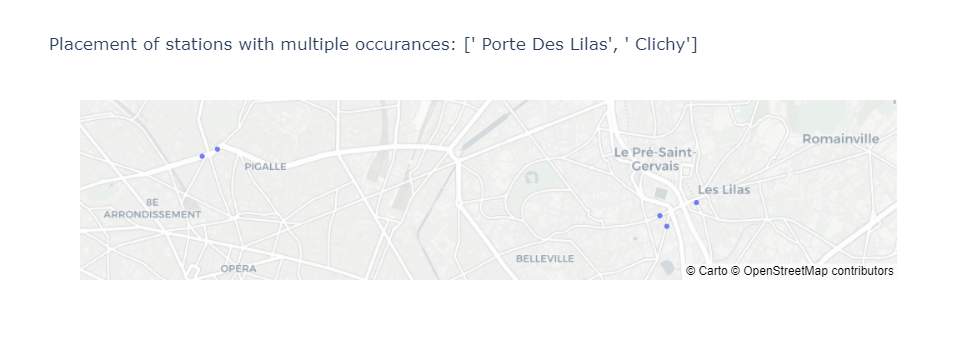

In [235]:
fig = px.scatter_mapbox(stat_rel, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = "carto-positron",
                        # color = np.arange(0,len(name_checkup), 1), 
                        # color_discrete_sequence  = px.colors.sequential.Plasma_r, #size = load_per_hour,
                        zoom  = 12, opacity = .9,
                        title = f'Placement of stations with multiple occurances: {[elem.title() for elem in name_checkup]}')

fig.show()

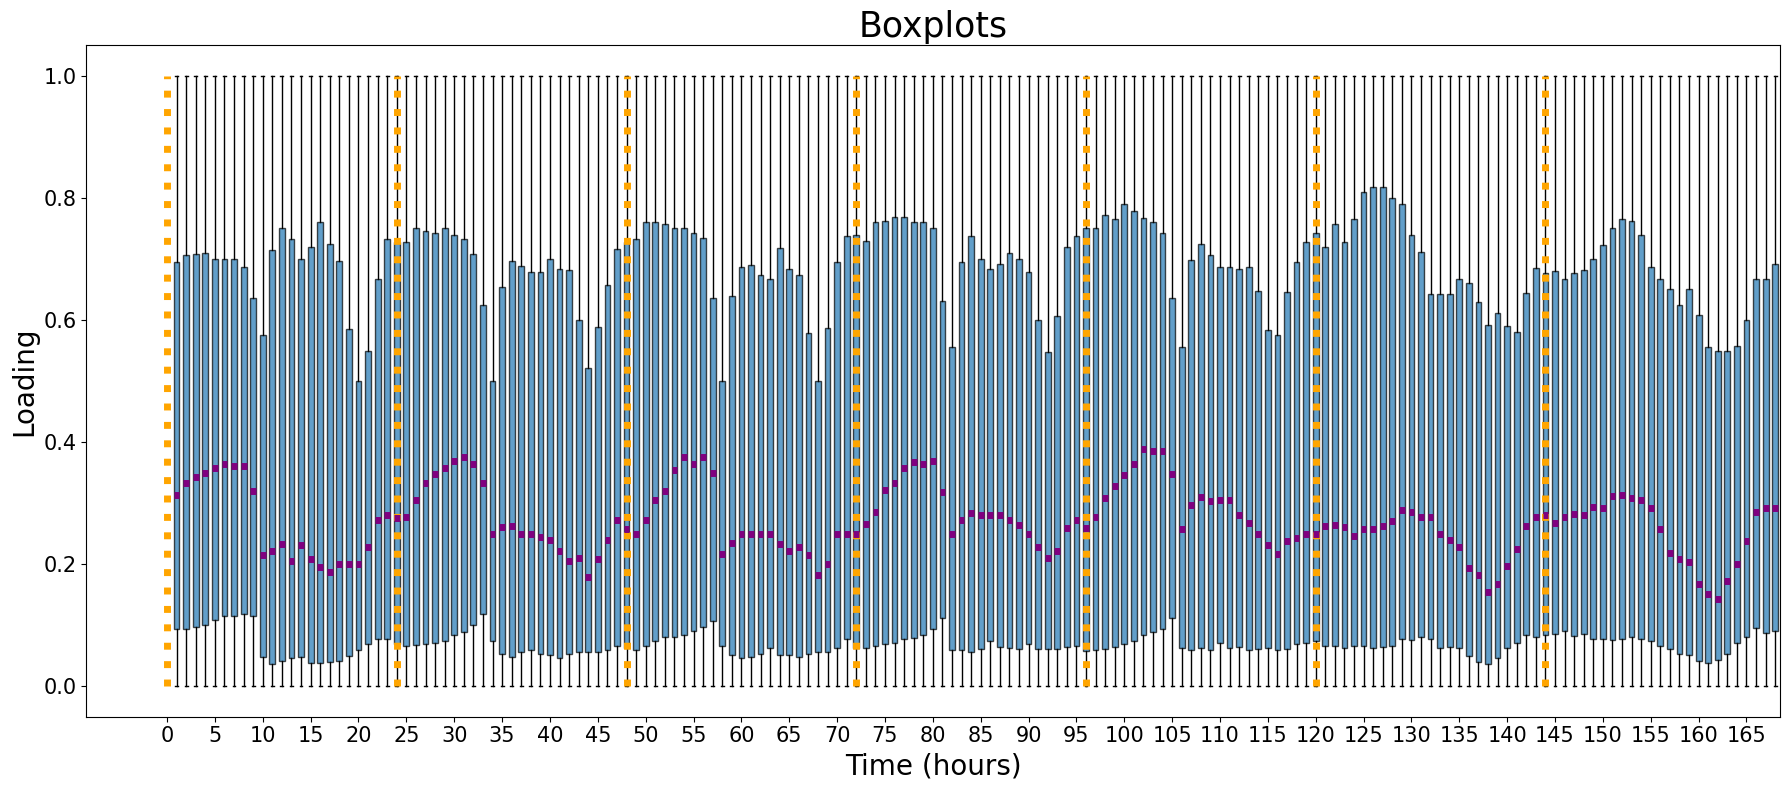

In [236]:
plt.figure(figsize = (18,8))

day_tick = np.arange(0,167,1)[::24]
# --- #
load_data = load.to_numpy()
bp = plt.boxplot(load_data, widths = 0.6, patch_artist = True)

for box in bp['boxes']:
    box.set_alpha(0.7)
    
for median in bp['medians']:
    median.set(color = "Purple", linewidth=5)
    
# --- #
    
plt.vlines(x = day_tick, ymin = 0, ymax = 1, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

# --- #

plt.xlabel('Time (hours)', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

In [237]:
print('--- Average loading ---')
mean = load.mean(axis=1) # Average per station
tot_mean = mean.mean()
print(f'{tot_mean:.4f}')

# --- #
print(" ")
print('--- Least loaded station, on average ---')
print(f' {coord.loc[mean.idxmin()]} with {mean.min():.4f}')

# --- 
print('')

print('--- Fullest loaded station, on average ---')
print(f' {coord.loc[mean.idxmax()]} with {mean.max():.4f}')

--- Average loading ---
0.3816
 
--- Least loaded station, on average ---
 longitude              2.427934
latitude              48.873929
bonus                         1
names         HORNET (BAGNOLET)
Name: 997, dtype: object with 0.0161

--- Fullest loaded station, on average ---
 longitude                          2.398262
latitude                           48.81466
bonus                                     0
names         INSURRECTION AOUT 1944 (IVRY)
Name: 1107, dtype: object with 0.9194


## PCA

In [263]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
load_scaled = ss.fit_transform(load)

pca = PCA()
load_pca = pca.fit_transform(load_scaled) 
# load_pca = pca.fit_transform(load)

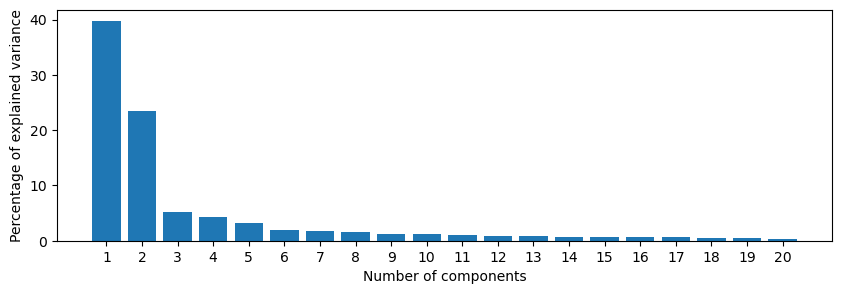

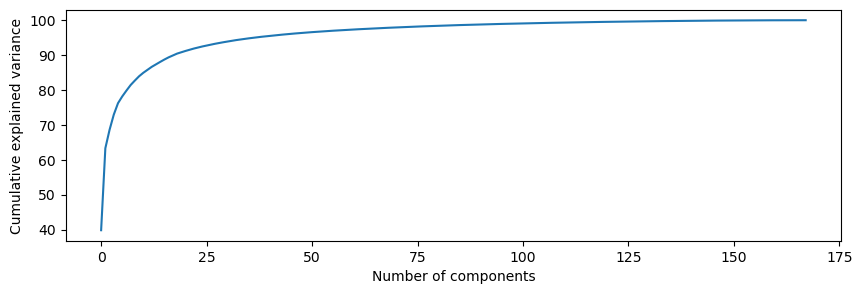

Variance explained by the first 5 components: 76.22


In [264]:
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.figure(figsize = (10, 3))
n_bars = 20
x_ticks = np.arange(1, n_bars + 1, 1)
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars])
plt.xlabel("Number of components")
plt.xticks(x_ticks)
plt.ylabel("Percentage of explained variance")
# plt.tight_layout()
plt.show()


plt.figure(figsize = (10, 3))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
# plt.tight_layout()
plt.show()
n_components = 5
print(f"Variance explained by the first {n_components} components:", round(sum([explained_variance_ratio[i] for i in range(n_components)]),2))

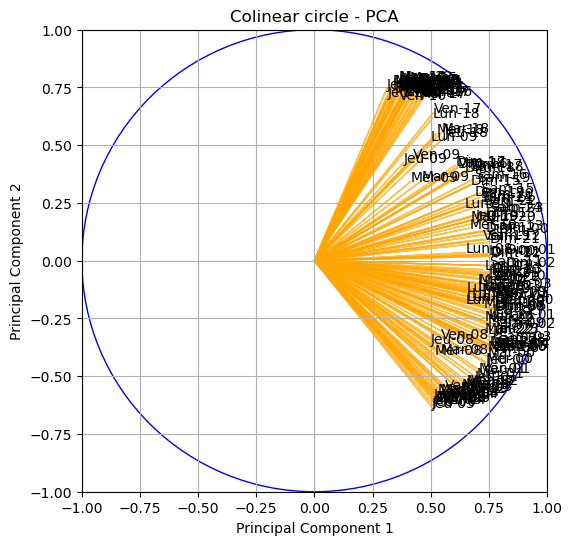

In [272]:
# Collinear circle
comp1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
comp2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(comp1, comp2, load.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'orange', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'blue', fill = False))

plt.title('Colinear circle - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

In [293]:
load_corr = load.corr()

# load_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

# mask = np.zeros_like(load_corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# load_corr[mask] = np.nan
# (load_corr
#  .style
#  .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
#  .highlight_null(color='#f1f1f1')  # Color NaNs grey
#  .format(precision=3))

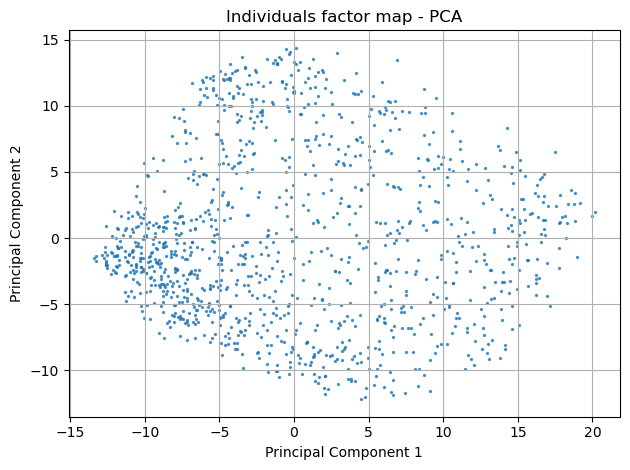

In [281]:
plt.figure()
plt.scatter(load_pca[:, 0], load_pca[:, 1], s=2, linewidths=1, alpha=0.7)

plt.title("Individuals factor map - PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.tight_layout()
plt.show()